In [ ]:
# based on 
# http://krasserm.github.io/2018/03/19/gaussian-processes/
# and
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

# Methods that use models with a fixed number of parameters are called parametric methods.

# In non-parametric methods, on the other hand, the number of parameters depend on the dataset size.

# instead of inferring a distributino over the parameters of a parametric
# model.
# Gaussian processes (GP) infer a distribution over functions directly

# A GP defines a prior over functions.

# implementation in numpy

In [38]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [112]:
def their_kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes 
    a covariance matrix from points in X1 and X2.
        
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [113]:
# equation 6 in http://krasserm.github.io/2018/03/19/gaussian-processes/
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    Computes a covariance matrix from points
    in X1 and X2.
    
    Args:
        X1: Array of m points (m x d).
        X1: Array of n points (n x d).
    
    Returns:
        Covariance matrix (m x n).
    """
    
    pre = -0.5/l**2
    # https://numpy.org/doc/stable/reference/generated/numpy.ufunc.outer.html
    sqdist = np.squeeze(np.subtract.outer(X1, X2)**2)
    return sigma_f**2 * np.exp(pre * sqdist)

In [219]:
X1 = np.random.uniform(size=(5, 1))
X2 = np.random.uniform(size=(8, 1))

X1 = np.sort(X1, 0)
X2 = np.sort(X2, 0)

In [226]:
np.outer(X1, X2)

array([[0.07380126, 0.09881052, 0.10842994, 0.11730644, 0.12732236,
        0.12754673, 0.13118913, 0.14975097],
       [0.08388835, 0.11231585, 0.12325004, 0.13333978, 0.14472466,
        0.1449797 , 0.14911993, 0.17021879],
       [0.22623337, 0.30289776, 0.33238552, 0.3595959 , 0.39029908,
        0.3909869 , 0.40215244, 0.45905264],
       [0.29145003, 0.39021458, 0.42820282, 0.46325718, 0.50281122,
        0.50369731, 0.51808156, 0.59138448],
       [0.39869602, 0.53380334, 0.58577026, 0.63372371, 0.6878326 ,
        0.68904475, 0.70872203, 0.80899851]])

In [228]:
np.squeeze(np.subtract.outer(X1, X2))

array([[-2.55571502e-01, -4.00610215e-01, -4.56397082e-01,
        -5.07875459e-01, -5.65961761e-01, -5.67263011e-01,
        -5.88386716e-01, -6.96034251e-01],
       [-2.32003713e-01, -3.77042426e-01, -4.32829293e-01,
        -4.84307670e-01, -5.42393971e-01, -5.43695222e-01,
        -5.64818927e-01, -6.72466461e-01],
       [ 1.00575691e-01, -4.44630216e-02, -1.00249888e-01,
        -1.51728266e-01, -2.09814567e-01, -2.11115817e-01,
        -2.32239523e-01, -3.39887057e-01],
       [ 2.52949943e-01,  1.07911230e-01,  5.21243630e-02,
         6.45985536e-04, -5.74403157e-02, -5.87415658e-02,
        -7.98652712e-02, -1.87512806e-01],
       [ 5.03522865e-01,  3.58484152e-01,  3.02697285e-01,
         2.51218908e-01,  1.93132607e-01,  1.91831357e-01,
         1.70707651e-01,  6.30601168e-02]])

In [220]:
np.array([x - X2 for x in X1]).shape

(5, 8, 1)

In [221]:
np.squeeze(np.array([x - X2 for x in X1])).T.shape

(8, 5)

In [222]:
mine = kernel(X1, X2)
theirs = their_kernel(X1, X2)
mine - theirs

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.11022302e-16,  0.00000000e+00,  1.11022302e-16,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.11022302e-16,
         1.11022302e-16,  1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.11022302e-16,
         0.00000000e+00,  0.00000000e+00,  1.11022302e-16,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.11022302e-16]])

In [118]:
%%timeit
kernel(X1, X2)

6.43 µs ± 390 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [119]:
%%timeit
their_kernel(X1, X2)

18 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Prior

In [121]:
# finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

In [122]:
X.shape

(50, 1)

In [123]:
# mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

In [135]:
# dimension of gaussian
print(cov.shape)

(50, 50)


In [161]:
# draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, size=1000)

In [162]:
samples.shape

(1000, 50)

In [163]:
np.mean(samples)

-0.00444707287408616

In [164]:
uncertainty = 1.96 * np.sqrt(np.diag(cov))

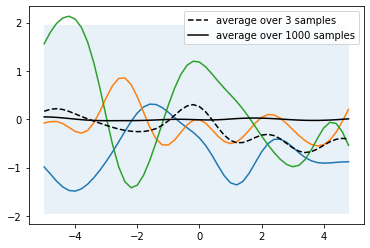

In [165]:
plt.figure()
plt.plot(X, samples[0])
plt.plot(X, samples[1])
plt.plot(X, samples[2])
plt.plot(X, np.mean(samples[:3], axis=0), label='average over 3 samples', color='k', ls='--')
plt.plot(X, np.mean(samples, axis=0), label='average over 1000 samples', color='k')
plt.fill_between(X.ravel(), mu.ravel() + uncertainty, mu.ravel() - uncertainty, alpha=0.1)
plt.legend()

## prediction from noise-free training data

In [235]:
from numpy.linalg import inv

# equations 4 and 5 in http://krasserm.github.io/2018/03/19/gaussian-processes/
def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''  
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    
    Ky = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(X_train.shape[0])
    Kstar = kernel(X_train, X_s, l, sigma_f)
    Kstarstar = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(X_s.shape[0])
    
    mu_star = np.dot( Kstar.T, np.dot(inv(Ky), Y_train) )
    

    
    sigma_star = Kstarstar - np.dot(Kstar.T, np.dot(inv(Ky), Kstar) )
    
    return mu_star, sigma_star

In [205]:
def their_posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''  
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

In [206]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
their_mu_s, their_cov_s = their_posterior_predictive(X, X_train, Y_train)
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

In [207]:
cov_s - their_cov_s

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.35525272e-20,  3.38813179e-21, -3.38813179e-21],
       [-1.11022302e-16,  1.11022302e-16,  0.00000000e+00, ...,
         1.35525272e-20,  6.77626358e-21, -1.69406589e-21],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.35525272e-20,  6.77626358e-21, -3.38813179e-21],
       ...,
       [-6.77626358e-21, -2.03287907e-20, -1.35525272e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.77626358e-21, -1.01643954e-20,  3.38813179e-21, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.08219768e-21, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [208]:
mu_s - their_mu_s

array([[-4.44089210e-16],
       [-2.22044605e-16],
       [-1.11022302e-16],
       [-3.33066907e-16],
       [-1.11022302e-16],
       [-4.44089210e-16],
       [-2.22044605e-16],
       [-2.77555756e-16],
       [-1.11022302e-16],
       [-3.19189120e-16],
       [-1.11022302e-16],
       [-3.33066907e-16],
       [-4.44089210e-16],
       [-2.22044605e-16],
       [-1.11022302e-16],
       [-8.88178420e-16],
       [-1.11022302e-16],
       [-5.55111512e-16],
       [-2.22044605e-16],
       [-5.55111512e-16],
       [-3.33066907e-16],
       [-4.44089210e-16],
       [-3.33066907e-16],
       [-2.22044605e-16],
       [-1.38777878e-16],
       [-1.38777878e-17],
       [-5.55111512e-17],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.11022302e-16],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [ 0.00000000e+00],
       [-1.11022302e-16],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 5.5

In [209]:
mu_s.shape

(50, 1)

In [210]:
cov_s.shape

(50, 50)

In [236]:
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 100)

In [275]:
# samples_test = np.random.multivariate_normal(mu_s.ravel(), np.eye(cov_s.shape[0])/100, 100)

In [276]:
uncertainty = 1.96 * np.sqrt(np.diag(cov_s))

In [277]:
mu_s.shape

(50, 1)

In [278]:
uncertainty.shape

(50,)

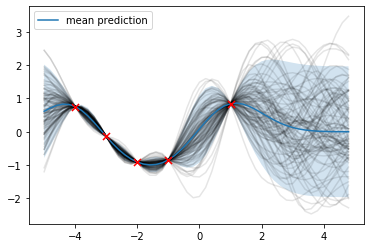

In [280]:
plt.figure()
for i in range(len(samples)):
    plt.plot(X, samples[i], c='k', alpha=0.1)
plt.scatter(X_train, Y_train, c='r', s=50, zorder=10, marker='x')

plt.plot(X, mu_s, label='mean prediction')

plt.fill_between(X.ravel(), mu_s.ravel() - uncertainty, mu_s.ravel() + uncertainty, alpha=0.2)

# plt.plot(X, samples_test[0])

plt.legend()